In [123]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
%matplotlib inline
import os
from statsmodels.graphics.tsaplots import plot_acf

# Import data

In [124]:
os.listdir('data')

['air.csv', 'aust.csv', 'livestock2.csv', 'livestock3.csv', 'oildata.csv']

In [125]:
freq = ['A','A','A','A','QS-OCT']

In [126]:
alldata = []
for k in os.listdir('data'):
    data = pd.read_csv('data/'+str(k))
    data.columns = ['date','value']
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date',inplace=True)
    alldata.append(data)

In [127]:
air,aust,livestock2,livestock3,oildata = alldata[0],alldata[1],alldata[2],alldata[3],alldata[4]

In [128]:
oildata.head()

,value
date,
1996-12-31,446.6565
1997-12-31,454.4733
1998-12-31,455.6630
1999-12-31,423.6322
2000-12-31,456.2713


In [129]:
oildata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 1996-12-31 to 2007-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


# 1. Single Exponential Smoothing 
Metode ini digunakan jika pola data tidak mengandung pola trend maupun musiman

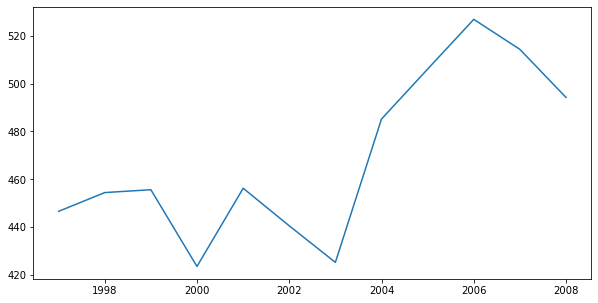

In [130]:
# model identification
plt.figure(figsize=(10,5))
plt.plot(oildata)
plt.show()

In [131]:
# Fitting Model
oildata.index = oildata.index.to_period('A')

In [132]:
oildata_model1 = SimpleExpSmoothing(oildata, initialization_method="heuristic")
oildata_fit1 = oildata_model1.fit()
print(oildata_fit1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  value   No. Observations:                   12
Model:             SimpleExpSmoothing   SSE                           7573.426
Optimized:                       True   AIC                             81.370
Trend:                           None   BIC                             82.340
Seasonal:                        None   AICC                            87.084
Seasonal Periods:                None   Date:                 Sun, 21 Mar 2021
Box-Cox:                        False   Time:                         16:11:17
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8920005                alpha                 True
initial_level              447.47840                

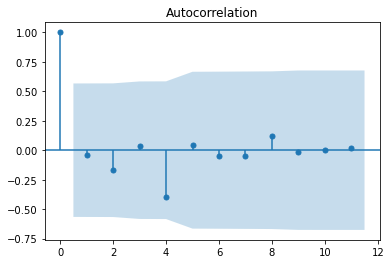

In [133]:
# Diagnostic models
plot_acf(pd.DataFrame(oildata_fit1.resid))
plt.show()

# 2. Double Exponential Smoothing
Metode ini digunakan jika pola data mengandung trend dengan tidak ada pola musiman

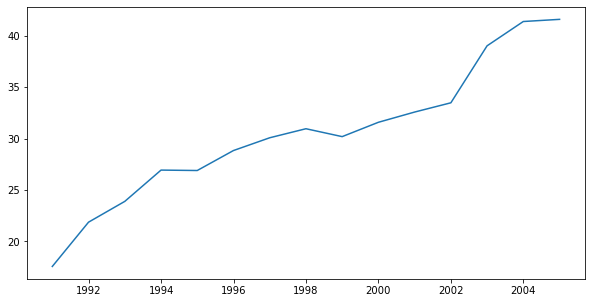

In [134]:
# model identification
plt.figure(figsize=(10,5))
plt.plot(air)
plt.show()

In [135]:
# Fitting Model
air.index = air.index.to_period('A')

In [136]:
air_model1 = Holt(air, initialization_method="heuristic")
air_fit1 = air_model1.fit()
print(air_fit1.summary())

                              Holt Model Results                              
Dep. Variable:                  value   No. Observations:                   15
Model:                           Holt   SSE                             43.279
Optimized:                       True   AIC                             23.894
Trend:                       Additive   BIC                             26.726
Seasonal:                        None   AICC                            34.394
Seasonal Periods:                None   Date:                 Sun, 21 Mar 2021
Box-Cox:                        False   Time:                         16:11:20
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.4901e-08                alpha                 True
smoothing_trend            2.827e-10                

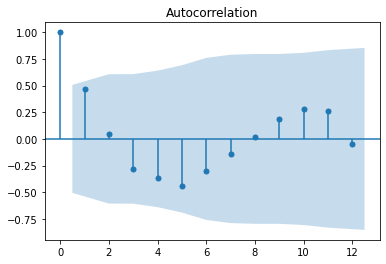

In [137]:
# Diagnostic models
plot_acf(pd.DataFrame(air_fit1.resid))
plt.show()

# 3. Triple Exponential Smoothing (Holt Winter)

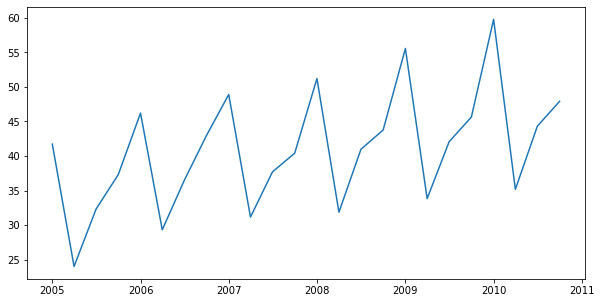

In [138]:
# model identification
plt.figure(figsize=(10,5))
plt.plot(aust)

In [144]:
# Fitting Model
aust.index = aust.index.to_period()

In [145]:
aust_model1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated")
aust_fit1 = aust_model1.fit()
print(aust_fit1.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    value   No. Observations:                   24
Model:             ExponentialSmoothing   SSE                             44.027
Optimized:                         True   AIC                             30.562
Trend:                         Additive   BIC                             39.987
Seasonal:                      Additive   AICC                            47.485
Seasonal Periods:                     4   Date:                 Sun, 21 Mar 2021
Box-Cox:                           True   Time:                         16:14:47
Box-Cox Coeff.:                 0.56781                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              1.4901e-08                alpha                 True
smoothing_trend          

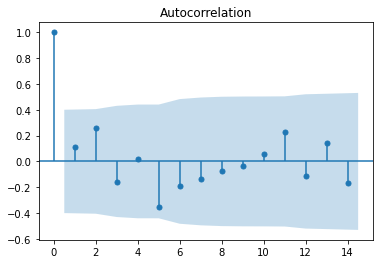

In [146]:
# Diagnostic models
plot_acf(pd.DataFrame(aust_fit1.resid))
plt.show()

# Refference
1. https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html
2. https://yintingchou.com/posts/2017-03-29-exponential-smoothing/